In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import ast

In [2]:
DATASET = '../data/interim/so-questions-preproc.csv'

In [3]:
df = pd.read_csv(DATASET)

In [4]:
df_qs = df.copy()

In [6]:
df_qs.drop(['Unnamed: 0'], axis =1)

creation_date   user_id  reputation  view_count  \
0   2022-02-05 10:36:08   6709058          81          13   
1   2022-02-05 05:45:33   7116458          11          19   
2   2022-02-04 20:05:21  16389467          15          14   
3   2022-02-04 09:36:00  10030258         138          13   
4   2022-02-04 08:47:59  13000747          15          17   
..                  ...       ...         ...         ...   
95  2022-01-28 10:22:02   1983854      245036          25   
96  2022-01-28 10:19:00  18056092          13          31   
97  2022-01-28 05:12:39  14507451          31          23   
98  2022-01-27 23:30:16    273924        5337          30   
99  2022-01-27 22:33:17  15173118          15          48   

                                                title  \
0   Is there a way to allow non-root pods to write...   
1   how to create Snapshot &amp; Release Folder fo...   
2                  mocha: command not found in GitLab   
3   Cleaning up project directory and file based v...   
4   remote: The project you were looking for could...   
..                                                ...   
95  How can I assign an issue to a milestone autom...   
96                       Gitlab multiple folders rule   
97  GITLAB Warning - &#39;NO NSA Protected Informa...   
98  Why is GitLab CI SAST not exluding directories...   
99    Included file does not have a valid YAML syntax   

                                                 body  \
0   im trying to deploy gitlab to onpremises k8s c...   
1   i want to create snapshot amp release folder i...   
2   i want to try cicd so i am working on a simple...   
3   i started learning gitlabci using a course on ...   
4   im getting this error while trying to deploy m...   
..                                                ...   
95  i am using gitlab issue templates and they wor...   
96  are there ways to merge row changes of multipl...   
97  from past two weeks i am getting this warning ...   
98  i have enabled sast scanning in gitlab ci gitl...   
99  i am including a remote gitlabciyml file but c...   

                                            title_prc  \
0   ['is', 'there', 'a', 'way', 'to', 'allow', 'no...   
1   ['how', 'to', 'create', 'snapshot', '&', 'amp'...   
2   ['mocha', ':', 'command', 'not', 'found', 'in'...   
3   ['cleaning', 'up', 'project', 'directory', 'an...   
4   ['remote', ':', 'the', 'project', 'you', 'were...   
..                                                ...   
95  ['how', 'can', 'i', 'assign', 'an', 'issue', '...   
96          ['gitlab', 'multiple', 'folders', 'rule']   
97  ['gitlab', 'warning', '-', '&', '#', '39;no', ...   
98  ['why', 'is', 'gitlab', 'ci', 'sast', 'not', '...   
99  ['included', 'file', 'does', 'not', 'have', 'a...   

                                             body_prc  
0   ['i', 'm', 'trying', 'to', 'deploy', 'gitlab',...  
1   ['i', 'want', 'to', 'create', 'snapshot', 'amp...  
2   ['i', 'want', 'to', 'try', 'cicd', 'so', 'i', ...  
3   ['i', 'started', 'learning', 'gitlabci', 'usin...  
4   ['i', 'm', 'getting', 'this', 'error', 'while'...  
..                                                ...  
95  ['i', 'am', 'using', 'gitlab', 'issue', 'templ...  
96  ['are', 'there', 'ways', 'to', 'merge', 'row',...  
97  ['from', 'past', 'two', 'weeks', 'i', 'am', 'g...  
98  ['i', 'have', 'enabled', 'sast', 'scanning', '...  
99  ['i', 'am', 'including', 'a', 'remote', 'gitla...  

[100 rows x 8 columns]

In [19]:
vectorizer = CountVectorizer(ngram_range=(3,3))
titles_vect = vectorizer.fit_transform(df_qs['title_prc'])
titles_vect = titles_vect.toarray()

In [29]:
print(titles_vect[0][30:40], len(titles_vect), len(titles_vect[0]))

[0 0 0 0 0 0 0 0 0 0] 100 793


In [30]:
vectorizer.get_feature_names_out()[:3]

array(['00 01 error', '01 error job', '10000 files in'], dtype=object)

In [34]:
tf_idf = TfidfTransformer()

In [37]:
tf_idf_questions = tf_idf.fit_transform(titles_vect)

In [40]:
tf_idf_questions = tf_idf_questions.toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [52]:
tf_idf_questions[0:10]
print(f'vector tf -idf dimensions: {tf_idf_questions[0].shape}')

vector tf -idf dimensions: (793,)


In [51]:
tf_idf_questions.shape

(100, 793)

In [46]:
feature_names = vectorizer.get_feature_names()
df_idf = pd.DataFrame(tf_idf_questions[0], index=feature_names, columns=["tfidf"]) 
df_idf.sort_values(by=["tfidf"],ascending=False)

/Users/william/miniconda3/envs/mlUI/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


tfidf
to write on             0.308955
non root pods           0.308955
allow non root          0.308955
on glusterfs volumes    0.308955
pods to write           0.308955
...                          ...
git remote add          0.000000
github too ubuntu       0.000000
gitlab 39 cli           0.000000
gitlab after upgrading  0.000000
zero commit in          0.000000

[793 rows x 1 columns]

In [84]:
# dataframe with all the tf idf scores 
df_tfidf = pd.DataFrame(tf_idf_questions, columns=feature_names)
df_tfidf.head(5)
df_tfidf.transpose()

0    1    2        3         4    5    6    7         8   \
00 01 error         0.0  0.0  0.0  0.27735  0.000000  0.0  0.0  0.0  0.000000   
01 error job        0.0  0.0  0.0  0.27735  0.000000  0.0  0.0  0.0  0.000000   
10000 files in      0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.333333   
39 bundle 39        0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000   
39 have permission  0.0  0.0  0.0  0.00000  0.235702  0.0  0.0  0.0  0.000000   
...                 ...  ...  ...      ...       ...  ...  ...  ...       ...   
you are not         0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000   
you don 39          0.0  0.0  0.0  0.00000  0.235702  0.0  0.0  0.0  0.000000   
you were looking    0.0  0.0  0.0  0.00000  0.235702  0.0  0.0  0.0  0.000000   
your cluster in     0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000   
zero commit in      0.0  0.0  0.0  0.00000  0.000000  0.0  0.0  0.0  0.000000   

                     9   ...   90   91   92   93   94   95   96   97   98   99  
00 01 error         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
01 error job        0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10000 files in      0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
39 bundle 39        0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
39 have permission  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
you are not         0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
you don 39          0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
you were looking    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
your cluster in     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
zero commit in      0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[793 rows x 100 columns]

In [91]:
sums = tf_idf_questions.sum(axis = 0)
print(sums[0:10], len(sums), type(sums), sums.shape)

[0.2773501  0.2773501  0.33333333 0.23570226 0.23570226 0.40824829
 0.23570226 0.35355339 0.37796447 0.4472136 ] 793 <class 'numpy.ndarray'> (793,)


In [94]:
print(sums[0,'text'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [78]:
tf_idf_questions.shape

(100, 793)

Only certain bigrams have score because they are the ones that appear in the first document, the rest are part of the corpus but not present in the first doc

In [63]:
df_qs['tf-idf_titles'] = list(tf_idf_questions)

In [74]:
df_qs = df_qs.drop(['tf-idf'], axis=1)


Unnamed: 0        creation_date   user_id  reputation  view_count  \
0            0  2022-02-05 10:36:08   6709058          81          13   
1            1  2022-02-05 05:45:33   7116458          11          19   
2            2  2022-02-04 20:05:21  16389467          15          14   
3            3  2022-02-04 09:36:00  10030258         138          13   
4            4  2022-02-04 08:47:59  13000747          15          17   
..         ...                  ...       ...         ...         ...   
95          95  2022-01-28 10:22:02   1983854      245036          25   
96          96  2022-01-28 10:19:00  18056092          13          31   
97          97  2022-01-28 05:12:39  14507451          31          23   
98          98  2022-01-27 23:30:16    273924        5337          30   
99          99  2022-01-27 22:33:17  15173118          15          48   

                                                title  \
0   Is there a way to allow non-root pods to write...   
1   how to create Snapshot &amp; Release Folder fo...   
2                  mocha: command not found in GitLab   
3   Cleaning up project directory and file based v...   
4   remote: The project you were looking for could...   
..                                                ...   
95  How can I assign an issue to a milestone autom...   
96                       Gitlab multiple folders rule   
97  GITLAB Warning - &#39;NO NSA Protected Informa...   
98  Why is GitLab CI SAST not exluding directories...   
99    Included file does not have a valid YAML syntax   

                                                 body  \
0   im trying to deploy gitlab to onpremises k8s c...   
1   i want to create snapshot amp release folder i...   
2   i want to try cicd so i am working on a simple...   
3   i started learning gitlabci using a course on ...   
4   im getting this error while trying to deploy m...   
..                                                ...   
95  i am using gitlab issue templates and they wor...   
96  are there ways to merge row changes of multipl...   
97  from past two weeks i am getting this warning ...   
98  i have enabled sast scanning in gitlab ci gitl...   
99  i am including a remote gitlabciyml file but c...   

                                            title_prc  \
0   ['is', 'there', 'a', 'way', 'to', 'allow', 'no...   
1   ['how', 'to', 'create', 'snapshot', '&', 'amp'...   
2   ['mocha', ':', 'command', 'not', 'found', 'in'...   
3   ['cleaning', 'up', 'project', 'directory', 'an...   
4   ['remote', ':', 'the', 'project', 'you', 'were...   
..                                                ...   
95  ['how', 'can', 'i', 'assign', 'an', 'issue', '...   
96          ['gitlab', 'multiple', 'folders', 'rule']   
97  ['gitlab', 'warning', '-', '&', '#', '39;no', ...   
98  ['why', 'is', 'gitlab', 'ci', 'sast', 'not', '...   
99  ['included', 'file', 'does', 'not', 'have', 'a...   

                                             body_prc  \
0   ['i', 'm', 'trying', 'to', 'deploy', 'gitlab',...   
1   ['i', 'want', 'to', 'create', 'snapshot', 'amp...   
2   ['i', 'want', 'to', 'try', 'cicd', 'so', 'i', ...   
3   ['i', 'started', 'learning', 'gitlabci', 'usin...   
4   ['i', 'm', 'getting', 'this', 'error', 'while'...   
..                                                ...   
95  ['i', 'am', 'using', 'gitlab', 'issue', 'templ...   
96  ['are', 'there', 'ways', 'to', 'merge', 'row',...   
97  ['from', 'past', 'two', 'weeks', 'i', 'am', 'g...   
98  ['i', 'have', 'enabled', 'sast', 'scanning', '...   
99  ['i', 'am', 'including', 'a', 'remote', 'gitla...   

                                        tf-idf_titles  
0   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3   [0.2773500981126146, 0.2773500981126146, 0.0, ...  
4   [0.0, 0.0, 0.0, 0.0, 0.23570226039551587, 0.0,...  
..                                                .

In [62]:
#df_qs['tf-idf'][1] == tf_idf_questions[1] ran this to ensure the column was created ok

### Initial token cloud using questions titles

In [6]:
# 1. convert Column to numpy array 
title_processed = df_qs['title_prc'].to_numpy()

In [7]:
# 2. Flatten the list of lists generated by step 1
title_corpus = [word for title_list in title_processed for word in ast.literal_eval(title_list)]

In [9]:
# 3. Create dictionary containing a key per each token and its respective frequency 

def count_token(token_list):
    count_token_dict = defaultdict()
    
    for token in token_list:
        if token in count_token_dict:
            count_token_dict[token] +=1
        else:
            count_token_dict[token] = 1
            
    return count_token_dict

token_freq = count_token(title_corpus)

In [13]:
# 4. Sort by value the previously created dictionary

token_freq_dsc = {key: value for key, value in sorted(token_freq.items(), key = lambda item: item[1], reverse=True)}

In [15]:
# 5. Initial word cloud with 100 words
word_cloud = WordCloud(background_color='white', min_word_length=2, max_words=100)
word_cloud.generate_from_frequencies(token_freq_dsc)

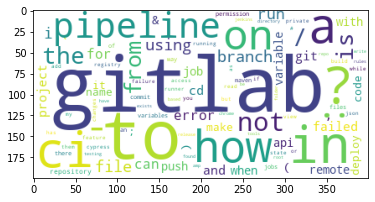

In [17]:
# 6. visualize using plt
plt.imshow(word_cloud)
plt.show()

#### Next iteration will be removing some stop words and using TF-IDF